In [1]:
from sys import path
path.append('../3DAssignmentSolver')

from main_optimized import Solver
from gurobi_solver import GurobiSolver
from pulp_solver import PulpSolver
from utils import create_problems, benchmark, duality_visualizer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
N = 30
num_problems = 10

solver1 = Solver(verbosity = False)
solver2 = GurobiSolver('/Users/jetchung/gurobi.json')

solvers = [solver1, solver2]
problems = create_problems(N, num_problems, verbosity = True)

df = benchmark(problems, solvers, verbosity = True)



--------------------------------------------------
Created 10 problem instances for size 30 with scale=100.
--------------------------------------------------


--------------------------------------------------
Benchmarking CustomSolver_1 Solver:
--------------------------------------------------
Instance 1: Objective Value: 2965.19, Duality % Gap: 0.97%
Instance 2: Objective Value: 2959.59, Duality % Gap: 1.11%
Instance 3: Objective Value: 2968.97, Duality % Gap: 0.87%
Instance 4: Objective Value: 2955.92, Duality % Gap: 1.20%
Instance 5: Objective Value: 2942.00, Duality % Gap: 1.73%
Instance 6: Objective Value: 2941.98, Duality % Gap: 1.69%
Instance 7: Objective Value: 2949.55, Duality % Gap: 1.40%
Instance 8: Objective Value: 2952.12, Duality % Gap: 1.38%
Instance 9: Objective Value: 2966.05, Duality % Gap: 0.93%
Instance 10: Objective Value: 2957.90, Duality % Gap: 1.19%
--------------------------------------------------
Avg. execution time for CustomSolver_1: 0.0760 seconds
--

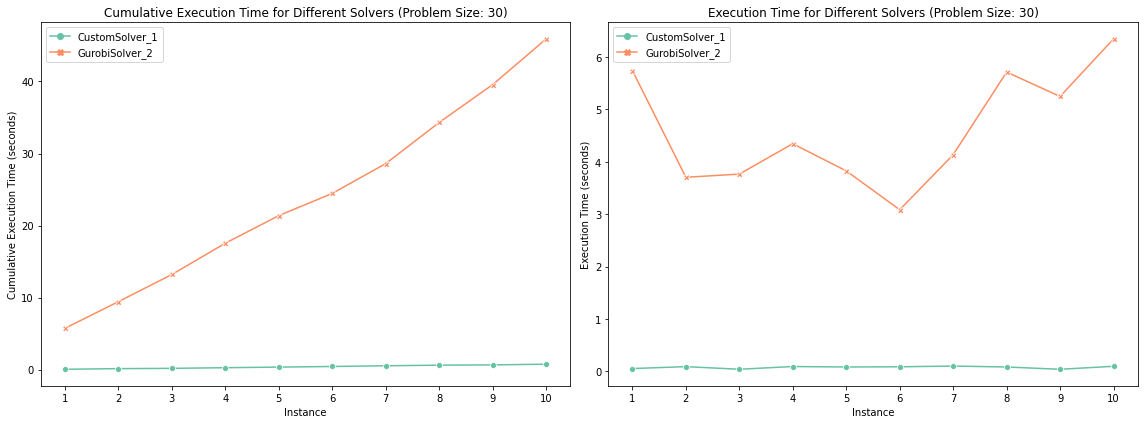

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.lineplot(data=df.cumsum(), dashes=False, markers=True, palette="Set2", ax=axes[0])
axes[0].set_xlabel("Instance")
axes[0].set_xticks(np.arange(1, num_problems + 1, 1))
axes[0].set_ylabel("Cumulative Execution Time (seconds)")
axes[0].set_title(f"Cumulative Execution Time for Different Solvers (Problem Size: {N})")
axes[0].legend()


sns.lineplot(data=df, dashes=False, markers=True, palette="Set2", ax=axes[1])
axes[1].set_xlabel("Instance")
axes[1].set_xticks(np.arange(1, num_problems + 1, 1))
axes[1].set_ylabel("Execution Time (seconds)")
axes[1].set_title(f"Execution Time for Different Solvers (Problem Size: {N})")
axes[1].legend()

plt.tight_layout()
plt.show()